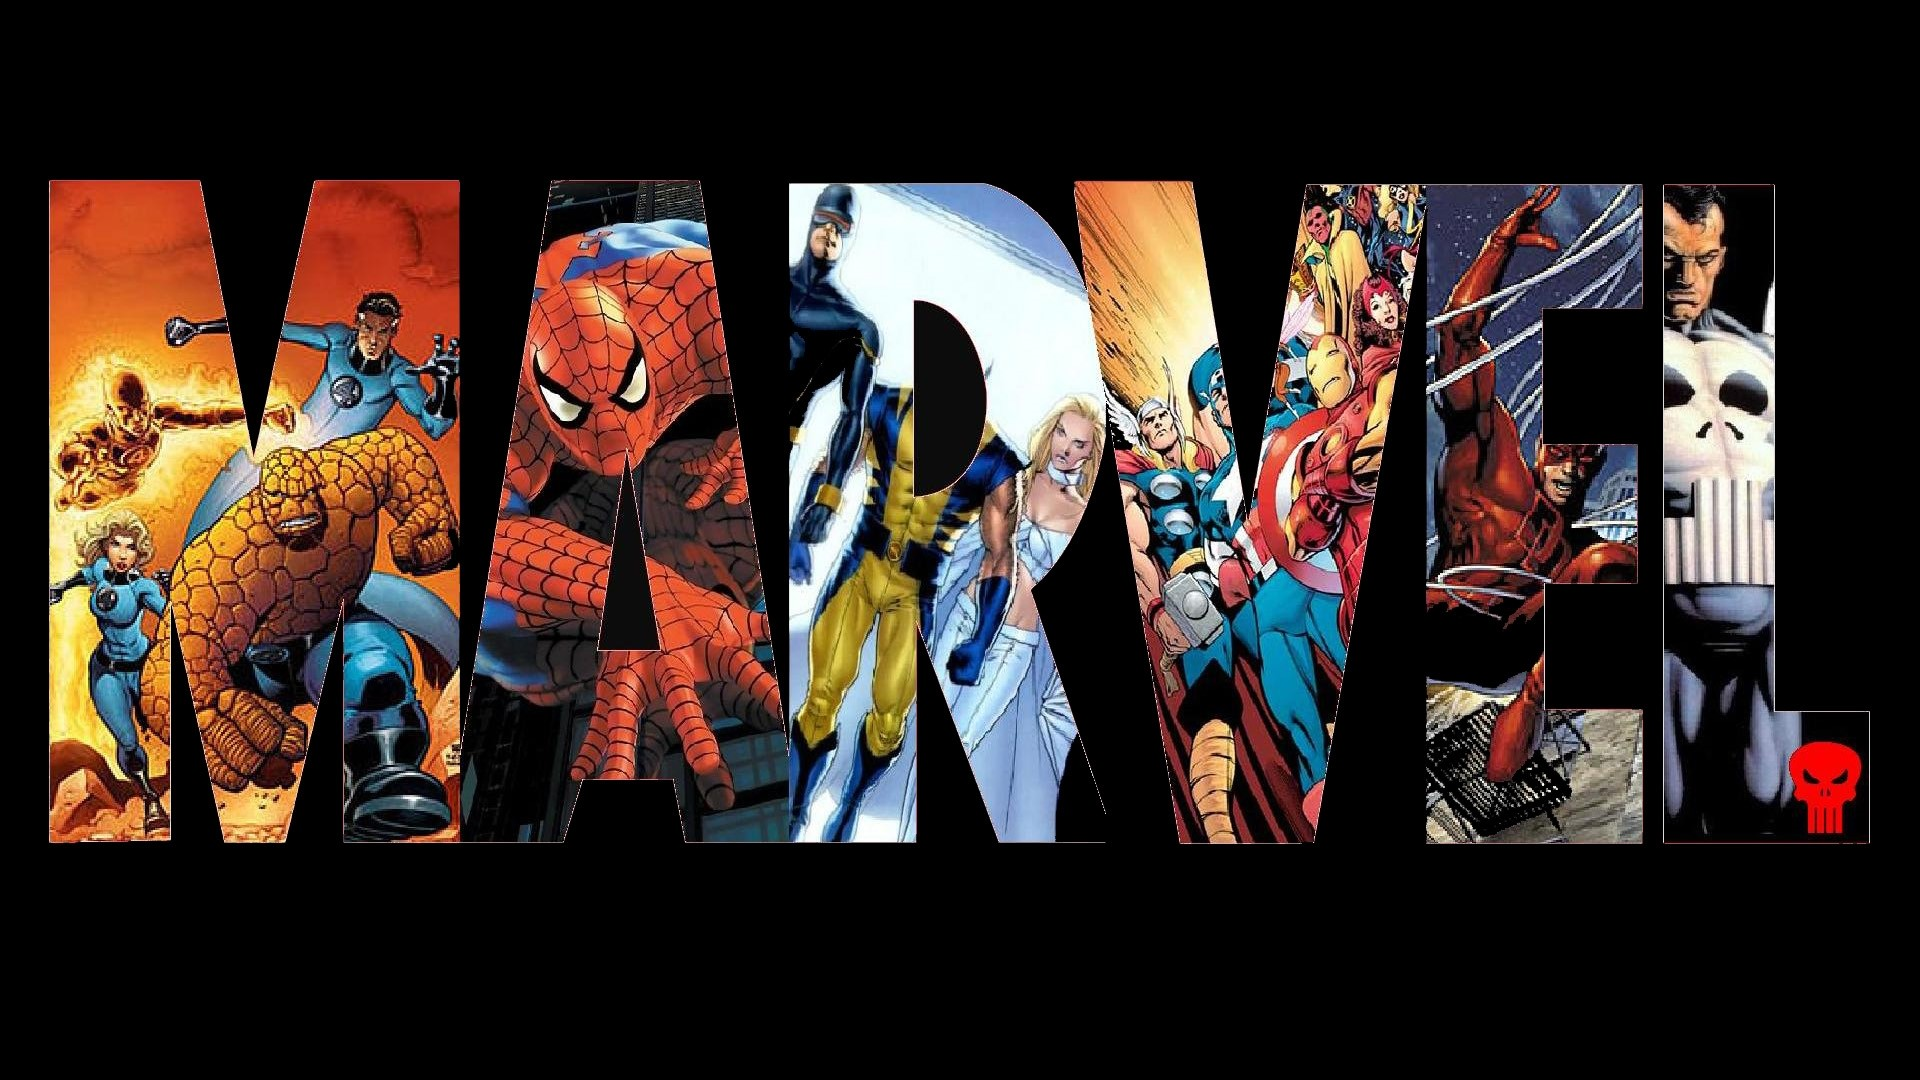

In [49]:
from IPython.display import Image
from IPython.display import display, HTML
%matplotlib inline

Image("http://getwallpapers.com/wallpaper/full/3/5/6/114249.jpg")

In [25]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('tp_marvel.db')


**Introdução**
<p>Nossa ideia inicial era trabalhar com um grande dataset contendo informações sobre heróis de diferentes editoras e universos. Todavia, isso seria um tanto quanto trabalhoso e demandaria uma análise minuciosa a fim de conseguir informações interessantes. Optamos então por restringir nossa análise ao universo Marvel e nos limitarmos a uma certa quantidade de heróis pertencentes a tal. Veremos que, mesmo com tais restrições, conseguimos traçar algumas análises bem interessantes e curiosas.</p>

**Dataset 1 (Poderes individuais)**: dfpower
<p>O primeiro dataset a set inserido no nosso banco contém informações sobre os superpoderes de vários super heróis de diferentes universos. A partir dele, extraímos um sub-dataset que trabalharemos. </p>

In [ ]:
dfpower = pd.read_csv('datasets/power/super_hero_powers.csv')
dfpower.to_sql('Poderes', conn) 


Com a simples finalidade de ilustrar o dataset original, fazemos uma consulta que retorna todo o conteúdo do mesmo. A partir dela percebemos que cada coluna faz referência a um super-poder e cada linha representa um determinado herói.

In [8]:
dfpower = pd.read_sql("SELECT * FROM Poderes", conn)
dfpower

,index,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,3-D Man,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,A-Bomb,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Abe Sapien,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Abin Sur,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Abomination,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Abraxas,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,Absorbing Man,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,7,Adam Monroe,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,Adam Strange,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,9,Agent Bob,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Agora, fazemos uma filtragem e selecionamos o que mais nos interessa: Somente os poderes mais comuns (que pelo menos 100 heróis o possuem).

In [27]:
for _ in dfpower:
    if isinstance(dfpower[_].sum(), np.int64):
        if dfpower[_].sum() < 100:   
            dfpower = dfpower.drop(_, axis = 1)
dfpower.to_csv(r'C:\Users\ejroc\Desktop\Marvel\datasets\power_filtrado\power.csv')
dfpower

,Name,Agility,Accelerated Healing,Durability,Stealth,Flight,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Energy Blasts,Stamina,Super Speed,Reflexes,Invulnerability
0,3-D Man,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False
1,A-Bomb,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False
2,Abe Sapien,True,True,True,False,False,True,True,True,True,True,False,True,False,True,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,True,True,False,True,True,False,True
5,Abraxas,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True
6,Absorbing Man,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
7,Adam Monroe,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,True,True,True,True,True,False,True,False,False,False,True,False,False
9,Agent Bob,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


O critério de escolha para o número "100" de aparições foi que, após outras consultas, podemos perceber que os outros superpoderes possuem uma faixa de ocorrência bem baixa (a maioria abaixo de 20) e com esse valor, conseguiríamos uma quantia considerável de dados sem nos limitarmos muito. Temos então nossa primeira tabela:

In [70]:
dfpower.to_sql('Poderes_Filtrados', conn)

ValueError: Table 'Poderes_Filtrados' already exists.

O segundo dataset escolhido é responsável pelas características físicas dos heróis de diferentes editoras. Ele contém, além do nome de cada um, o sexo, cor dos olhos, raça, cor dos cabelos, altura, editora, cor de pele, moral e peso. 

In [ ]:
dfheroes_information = pd.read_csv('datasets/wiki_simplificada/heroes_information.csv')
dfheroes_information.to_sql('Informacoes', conn)

Abaixo inserimos o mesmo em nosso banco de dados e realizamos uma consulta simples a fim de visualizar o conteúdo da tabela. 

In [30]:
dfheroes_information = pd.read_sql("SELECT * FROM 'Informacoes'", conn)
dfheroes_information

,index,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [31]:
dfheroes_information = pd.read_sql("SELECT * FROM "+
                                   "Poderes_Filtrados LEFT JOIN Informacoes "+
                                   "on Poderes_Filtrados.Name = Informacoes.name "+
                                   "WHERE Publisher = 'Marvel Comics'", conn)
dfheroes_information

,level_0,index,Name,Agility,Accelerated Healing,Durability,Stealth,Flight,Marksmanship,Weapons Master,...,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,1,1,A-Bomb,0,1,1,0,0,0,0,...,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,4,4,Abomination,0,1,0,0,0,0,0,...,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
2,5,5,Abraxas,0,0,0,0,1,0,0,...,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
3,6,6,Absorbing Man,0,0,1,0,0,0,0,...,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
4,9,9,Agent Bob,0,0,0,1,0,0,0,...,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
5,10,10,Agent Zero,0,0,0,0,0,0,0,...,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
6,11,11,Air-Walker,0,0,0,0,1,0,0,...,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0
7,12,12,Ajax,1,0,0,0,0,0,0,...,Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,-,bad,90.0
8,19,19,Ammo,0,0,0,0,0,0,1,...,Ammo,Male,brown,Human,Black,188.0,Marvel Comics,-,bad,101.0
9,21,21,Angel,1,1,1,1,1,0,0,...,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0


In [52]:
dfgender = pd.read_sql("SELECT Gender, count(PF.Name) AS Personagens "+
                       "FROM Poderes_Filtrados AS PF LEFT JOIN Informacoes AS I on PF.Name = I.name "+
                       "WHERE Publisher = 'Marvel Comics' GROUP BY Gender",conn)
dfgender

,Gender,Personagens
0,-,15
1,Female,99
2,Male,227


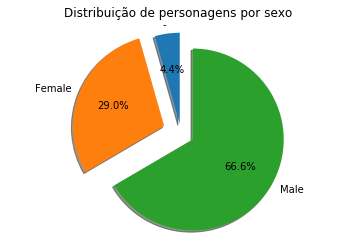

In [69]:
labels = dfgender['Gender']
sizes = dfgender['Personagens']
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.2, 0.15)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Distribuição de personagens por sexo')


plt.show()


In [34]:
##OBS: Seria melhor mudar "Gênero para Sexo?"
##OBS2: Spider-man sem gênero definido
dfgender = pd.read_sql("SELECT PF.Name "+
                       "FROM Poderes_Filtrados AS PF LEFT JOIN Informacoes AS I on PF.Name = I.name "+
                       "WHERE Publisher = 'Marvel Comics' AND Gender = '-'",conn)
dfgender

,Name
0,Bird-Brain
1,Box IV
2,Captain Universe
3,Ego
4,Fabian Cortez
5,Feral
6,Firelord
7,Forge
8,Ghost Rider II
9,Living Brain


In [35]:
dfrace = pd.read_sql("SELECT Race, count(PF.Name) AS Personagens "+
                       "FROM Poderes_Filtrados AS PF LEFT JOIN Informacoes AS I on PF.Name = I.name "+
                       "WHERE Publisher = 'Marvel Comics' GROUP BY Race",conn)
dfrace

,Race,Personagens
0,-,135
1,Alien,5
2,Android,2
3,Animal,1
4,Asgardian,5
5,Atlantean,1
6,Clone,1
7,Cosmic Entity,4
8,Cyborg,4
9,Demi-God,1


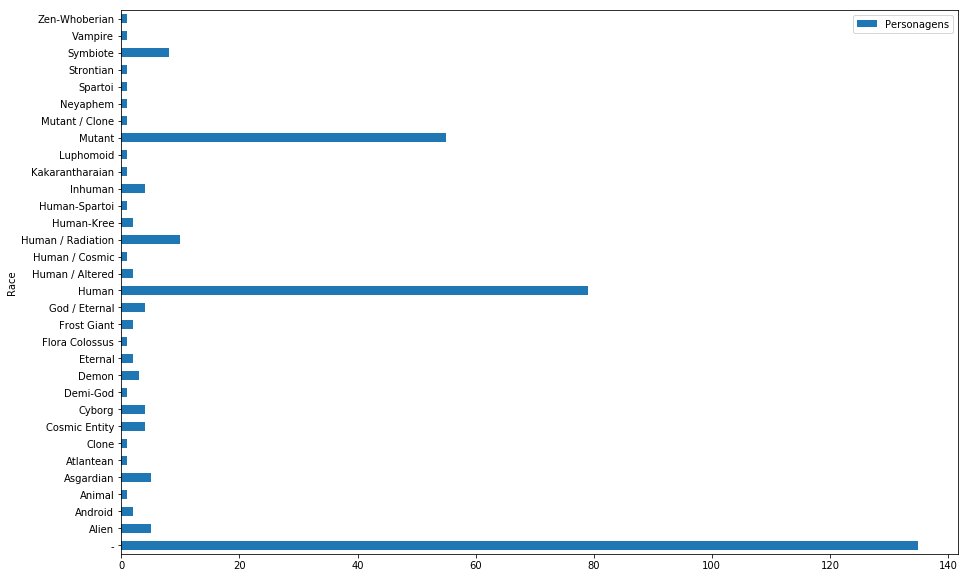

In [66]:
dfrace.plot(kind='barh', figsize=(15, 10), x = 'Race', y = 'Personagens')

In [ ]:
conn.close()